<a href="https://colab.research.google.com/github/juninhoisrael/classifica-o-de-clientes-inadimplentes/blob/main/Projeto_Final_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Classificação de clientes inadimplentes - Segmento Comunicação Digital**
Classificação com o uso de machinne learning em um banco de dados real.

##**1. Introdução**##
  Os clientes inadimplentes talvez seja uma das principais dores sofridas por muitas empresas atualmente e as razões, por esssa inadimplência, podem estar relacionados com diversos fatores, como: insatisfação com o que foi ofertado, problemas financeiros, etc. Seja qual for o motivo que tenha levado à inadimplência do cliente, é fundamental entender esses motivos e utilizar técnicas de cobrança para contornar essa situação. Afinal esse mesmo cliente que já foi inadimplente pode ser um consumidor de extrema importância para o  negócio no futuro. Pois, saber como lidar bem com clientes inadimplentes e resolver a situação de uma maneira adequada mostrará a qualidade do  atendimento da empresa, que pode ajudar a fidelizar consumidores e até mesmo gerar defensores da marca.
  Entretanto sabemos que nem sempre é fácil negociar divídas e muitas vezes o tempo e energia são "desperdiçados" com os clientes "errados". O primeiro passo para realizar técnicas de cobranças é identificar os clientes com maiores chances de negociação. Empresas que têm a cultura data driven otimizam essa busca, pois maximizam seus resultados  utilizando os dados para extrair informações e usam as informações para tomar decisões.
  Em um cenário de comunicação digital, dentre o portfólio de produtos, como SMS, E-mail, Telecom, Bots e Agentes Virtuais de Voz, a implementação, através da ciência de dados e machinne learning, de uma solução para o produto de agentes virtuais de voz, que a possibilidade de classificar clientes inadimplentes propensos ou não a um acordo comercial – pagamento da dívida.  
  Através da implementação da solução, espera-se agregar valor ao produto e as partes envolvidas, otimizar o tempo nas tomadas de decisões, fornecer  insights aos analistas de negócios, automatizar processos, escalar a operação, possibilitar ofertas direcionadas / diferenciadas de acordos comerciais – conforme o público alvo, aumentar os acordos comerciais, reduzir os custos operacionais e consequentemente o aumento de receita.
  Com base no contexto, problema e impacto esperado desta solução, entendemos que a estratégia será a construção de um modelo de classificação, utilizando os dados históricos da companhia em junção com um parceiro de negócios, para identificação da propensão de cada cliente no pagamento da divida. Para inicio, pretendemos utilizar algumas features como sexo, score, idade, classe econômica, situação empregatícia, persona de crédito, unidade federativa e renda, afim de identificar as suas respectivas correlações com a variavel resposta - acordo.
  A taxa de acordo entre empresas e devedores varia de acordo com a estratégia adotada e com mais informaões dá pra planejar mais estratégias. Não fechar um acordo não significa apenas deixar de ganhar o valor de contrato, mas também todas as outras eventuais oportunidades de negócios.

Mas quais são as características que leva um cliente a não fechar um acordo?




#2.**Coleta de dados**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TERA/Desafio Final/base_projeto.csv', sep = ';', encoding = 'UTF-8') 
dados.sample(10)


,SEXO,IDADE,GERAÇÃO,RENDA,CLASSEECONOMICA,UF,AREARISCO,FLAG_DE_SOCIO,FLAG_DE_VEICULO,FLAG_DE_BOLSAFAMILIA,FLAG_DE_APOSENTADOS,FLAG_DE_OBITO,FLAG_DE_IMOVEL,EMPREGO_FORMAL,SCORE,SCORE_FAIXA,PERSONADECREDITO,SCORE_DIGITAL,ACORDO
1945,M,75.0,BABY_BOOMER,7.001 ATÉ 8.000,B,PE,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,206.0,RISCO ALTO,PAGO QUANDO PUDER,Digital --,0
486,M,75.0,BABY_BOOMER,1.000 ATÉ 2.000,D,CE,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,803.0,RISCO MUITO BAIXO,O BEM AMADO,Digital --,0
4321,F,53.0,GEN X,1.000 ATÉ 2.000,D,GO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,265.0,RISCO ALTO,PAGO QUANDO PUDER,Digital --,1
353,F,80.0,VETERANOS,1.000 ATÉ 2.000,D,PE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,265.0,RISCO ALTO,PAGO QUANDO PUDER,Digital --,0
1359,F,31.0,GEN Y,1.000 ATÉ 2.000,D,MG,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,402.0,RISCO MÉDIO,QUEM SOU EU,Digital +,0
2473,F,48.0,GEN X,1.000 ATÉ 2.000,D,MG,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,121.0,RISCO MUITO ALTO,FUJAM DE MIM,Digital -,0
1950,F,39.0,GEN Y,3.001 ATÉ 4.000,C,RJ,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,386.0,RISCO MÉDIO,QUEM SOU EU,Digital ++,0
4901,F,49.0,GEN X,1.000 ATÉ 2.000,D,PE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,519.0,RISCO BAIXO,SEMPRE PRESENTE,Digital --,1
2221,M,55.0,GEN X,2.001 ATÉ 3.000,D,SP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,907.0,RISCO MUITO BAIXO,O BEM AMADO,Digital --,0
627,I,77.0,VETERANOS,5.001 ATÉ 6.000,B,SP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,RISCO MUITO BAIXO,O BEM AMADO,Digital --,1


**DICIONÁRIO**
- SEXO: Sexo do cliente
- IDADE: Idade do cliente
- GERAÇÃO: Geração que o cliente nasceu
- RENDA: Renda do cliente	
- CLASSEECONOMICA: A classe econômica a qual o cliente está inserido	
- UF: Estaddo de residência do ciente
- AREARISCO: Variável que indica se a área em que o cliente mora é boa ou má pagadora
- FLAG_DE_SOCIO: se é sócio de algum negócio
- FLAG_DE_VEICULO: se possui veículo
- FLAG_DE_BOLSAFAMILIA: Se recebe o bolsa família	
- FLAG_DE_APOSENTADOS: Se já aposentou
- FLAG_DE_OBITO:se  já faleceu	
- FLAG_DE_IMOVEL: se possui imóvel	
- EMPREGO_FORMAL: Se é empregado clt	
- SCORE: Score  Serasa 	
-	SCORE_FAIXA:  	
- PERSONADECREDITO: 	
- SCORE_DIGITAL: 	
- ACORDO: Target se o acordo foi ou não realizado

## EDA

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEXO                  4984 non-null   object 
 1   IDADE                 4984 non-null   float64
 2   GERAÇÃO               4984 non-null   object 
 3   RENDA                 4922 non-null   object 
 4   CLASSEECONOMICA       4984 non-null   object 
 5   UF                    4417 non-null   object 
 6   AREARISCO             4984 non-null   float64
 7   FLAG_DE_SOCIO         4984 non-null   float64
 8   FLAG_DE_VEICULO       4984 non-null   float64
 9   FLAG_DE_BOLSAFAMILIA  4984 non-null   float64
 10  FLAG_DE_APOSENTADOS   4984 non-null   float64
 11  FLAG_DE_OBITO         4984 non-null   float64
 12  FLAG_DE_IMOVEL        4984 non-null   float64
 13  EMPREGO_FORMAL        4984 non-null   float64
 14  SCORE                 4984 non-null   float64
 15  SCORE_FAIXA          

O data set possui poucos valores nulos.

In [ ]:
dados.describe()

,IDADE,AREARISCO,FLAG_DE_SOCIO,FLAG_DE_VEICULO,FLAG_DE_BOLSAFAMILIA,FLAG_DE_APOSENTADOS,FLAG_DE_OBITO,FLAG_DE_IMOVEL,EMPREGO_FORMAL,SCORE,ACORDO
count,4984.000000,4984.000000,4984.00000,4984.000000,4984.000000,4984.000000,4984.000000,4984.000000,4984.000000,4984.000000,5000.00000
mean,44.701445,0.012039,0.27508,0.147472,0.091894,0.146268,0.022873,0.022873,0.515650,437.246188,0.50000
std,15.683349,0.109069,0.44660,0.354611,0.288905,0.353410,0.149514,0.149514,0.499805,250.310445,0.50005
min,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,32.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,238.000000,0.00000
50%,42.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,411.000000,0.50000
75%,56.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,624.000000,1.00000
max,97.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,1.00000


Os clientes desse banco têm uma idade média de 44 anos. Idade mínima de 18 anos e máxima de 97 anos. A pontuação de crédito fica em torno de 437 pontos e o índice médio de estabilidade de emprego é 0,5.
Analisando a variável de Acordo, observa-se que 50% dos clientes fecharam acordo.

# **3. TRATAMENTO DE DADOS**

In [ ]:
db_tratamento = dados.copy()

In [ ]:
# Dados numéricos são mais fáceis de trabalhar. Sendo assim a transformação de nomes por números pode facilitar a exploração dos dados
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
db_tratamento['RENDA'] = le.fit_transform(db_tratamento['RENDA'])
db_tratamento['GERAÇÃO'] = le.fit_transform(db_tratamento['GERAÇÃO'])
db_tratamento['SCORE_FAIXA'] = le.fit_transform(db_tratamento['SCORE_FAIXA'])
db_tratamento['PERSONADECREDITO'] = le.fit_transform(db_tratamento['PERSONADECREDITO'])
db_tratamento['SCORE_DIGITAL'] = le.fit_transform(db_tratamento['SCORE_DIGITAL'])
db_tratamento['SEXO'] = le.fit_transform(db_tratamento['SEXO'])
db_tratamento['UF'] = le.fit_transform(db_tratamento['UF'])
db_tratamento['CLASSEECONOMICA'] = le.fit_transform(db_tratamento['CLASSEECONOMICA'])
db_tratamento.head(10)

,SEXO,IDADE,GERAÇÃO,RENDA,CLASSEECONOMICA,UF,AREARISCO,FLAG_DE_SOCIO,FLAG_DE_VEICULO,FLAG_DE_BOLSAFAMILIA,FLAG_DE_APOSENTADOS,FLAG_DE_OBITO,FLAG_DE_IMOVEL,EMPREGO_FORMAL,SCORE,SCORE_FAIXA,PERSONADECREDITO,SCORE_DIGITAL,ACORDO
0,2,53.0,1,9,3,18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,2,0,0,0
1,1,40.0,2,9,3,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,257.0,0,3,2,0
2,2,48.0,1,21,1,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,852.0,3,2,2,1
3,0,48.0,1,27,4,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,810.0,3,2,4,1
4,2,45.0,1,19,2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,418.0,4,4,3,1
5,2,64.0,0,0,3,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,615.0,1,5,4,1
6,0,73.0,0,9,3,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,672.0,1,5,4,1
7,0,33.0,2,0,3,13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,284.0,0,3,0,1
8,2,32.0,2,0,4,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,384.0,4,4,0,1
9,2,42.0,2,9,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.0,3,2,1,1


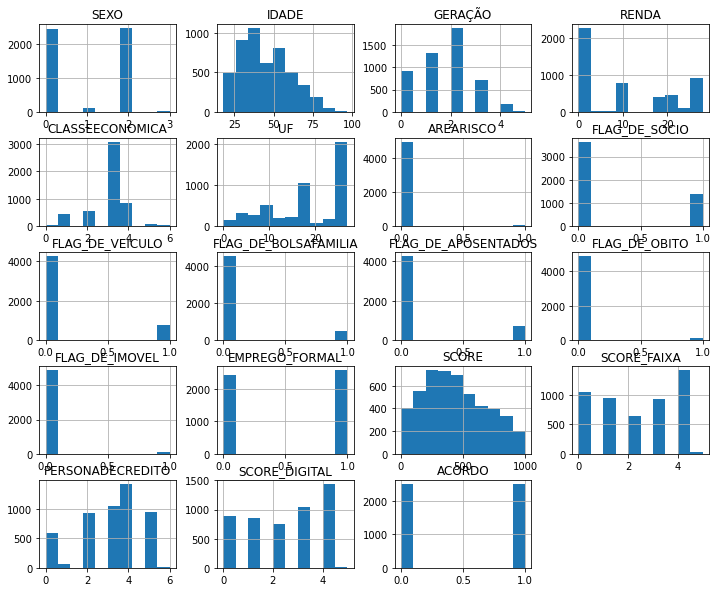

In [ ]:
db_tratamento.hist(figsize=(12,10));


- A variável Idade possui a maioria dos clientes entre 25 a 50 anos e poucos clientes têm idade superior a 75 anos.
- A  distribuição da variável geração, mostra um grande número de clientes que são da geração y e z.
- A distribuição da variável renda do Cliente mostra que a maioria ganha ate 2000,00 por mês.
- Os graficos das variáveis área de risco, flag de imovel, veiculo, obito e aposentados indicam que a maioria dos clientes não possuem casa própria e veiculo. A maioria conrinua viva e ainda não aposentaram e não moram em área de risco. 
- A empregabilidade está balanceada.
- A distribuição da variável score está levemente assimétrica a direita.
- E, para a variável Acordo, observa-se balanceamento.

In [ ]:
db_tratamento[["RENDA"]].value_counts(sort = False)
#
#0 = 1000 a 2000   
#1 = 2001 a 3000     
#2 = 3001 a 4000     
#3 = 4001 a 5000    
#4 = 5001 a 6000    
#5 = 6001 a 7000     
#6 = 7001 a 8000      
#7 = 8001 a 9000           
#8 = 9001 a 10000           
#9 = 10001 a 11000         
#10 = 11001 a 12000          
#11 = 12001 a 13000         
#12 = 13001 a 14000        
#13 = 14001 a 15000          
#14 = 15001 a 16000          
#15 = 16001 a 17000          
#16 = 17001 a 18000         
#17 = 18001 a 19000         
#18 = 19001 a 20000         
#19 = 20001 a 21000       
#20 = 21001 a 22000       
#21 = 22001 a 23000      
#22 = 23001 a 24000         
#23 = 24001 a 25000        
#24 = 25001 a 26000        
#25 = 26001 a 27000         
#26 = 27001 a 28000       
#27 = 28001 a 29000      
#28 = 29001 a 30000        

RENDA
0        2222
1          28
2          16
3           9
4          21
5           6
6           8
7           3
8           4
9         765
10          1
11          5
12          2
13          5
14          1
15          2
16          1
17          1
18          1
19        401
20        182
21        213
22         66
23         37
24         49
25         23
26          8
27        842
28         78
dtype: int64

In [ ]:
db_tratamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEXO                  5000 non-null   int64  
 1   IDADE                 4984 non-null   float64
 2   GERAÇÃO               5000 non-null   int64  
 3   RENDA                 5000 non-null   int64  
 4   CLASSEECONOMICA       5000 non-null   int64  
 5   UF                    5000 non-null   int64  
 6   AREARISCO             4984 non-null   float64
 7   FLAG_DE_SOCIO         4984 non-null   float64
 8   FLAG_DE_VEICULO       4984 non-null   float64
 9   FLAG_DE_BOLSAFAMILIA  4984 non-null   float64
 10  FLAG_DE_APOSENTADOS   4984 non-null   float64
 11  FLAG_DE_OBITO         4984 non-null   float64
 12  FLAG_DE_IMOVEL        4984 non-null   float64
 13  EMPREGO_FORMAL        4984 non-null   float64
 14  SCORE                 4984 non-null   float64
 15  SCORE_FAIXA          

In [ ]:
db_tratamento.dropna(inplace=True) #Eliminação dos dados nulos, visto que são poucos.

## Visualização de Dados - Qual o perfil de clientes que fecharam o acordo?

In [ ]:
import numpy as np #  pacote algebra linear;
import seaborn as sns #visualização de dados;
import matplotlib.pyplot as plt


**Variáveis Numéricas**

In [ ]:
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]

In [ ]:
# porcentagem de clientes que sairam do banco
db_tratamento['ACORDO'].sum()/db_tratamento['ACORDO'].count()

0.5004012841091493

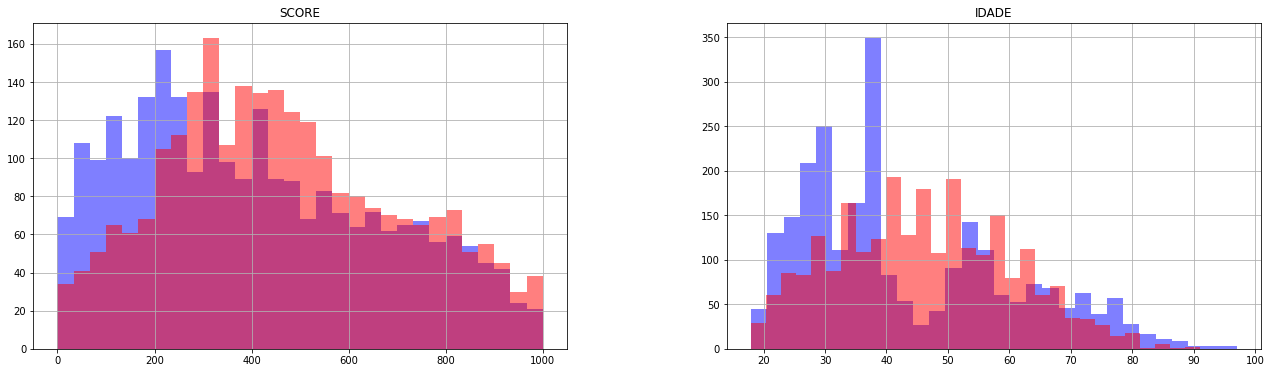

In [ ]:
db_tratamento['ACORDO_cat']=db_tratamento['ACORDO'].replace([0,1],['Não','Sim'])
x_cont=['SCORE','IDADE']
fig, ax = plt.subplots(1, 2, figsize=(22, 6));
db_tratamento[db_tratamento.ACORDO_cat == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
db_tratamento[db_tratamento.ACORDO_cat == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

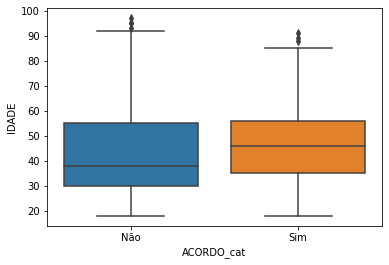

In [ ]:
sns.boxplot(x="ACORDO_cat", y="IDADE", data=db_tratamento)


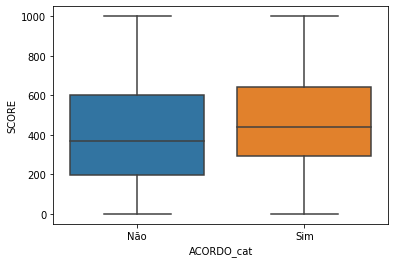

In [ ]:
sns.boxplot(x="ACORDO_cat", y="SCORE", data=db_tratamento)

Quanto maior o score, maior a chance de fechamento de acordo
Quanto mais velho, maior a chance de fechamento no acordo

###**Variáveis Categóricas**

 Primeiro vamos analisar as variáveis categóricas em relação a variável de saída (Acordo). Utilizaremos gráficos de barras para esse fim.



In [ ]:
db_tratamento

,SEXO,IDADE,GERAÇÃO,RENDA,CLASSEECONOMICA,UF,AREARISCO,FLAG_DE_SOCIO,FLAG_DE_VEICULO,FLAG_DE_BOLSAFAMILIA,FLAG_DE_APOSENTADOS,FLAG_DE_OBITO,FLAG_DE_IMOVEL,EMPREGO_FORMAL,SCORE,SCORE_FAIXA,PERSONADECREDITO,SCORE_DIGITAL,ACORDO,ACORDO_cat
0,2,53.0,1,9,3,18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,2,0,0,0,Não
1,1,40.0,2,9,3,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,257.0,0,3,2,0,Não
2,2,48.0,1,21,1,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,852.0,3,2,2,1,Sim
3,0,48.0,1,27,4,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,810.0,3,2,4,1,Sim
4,2,45.0,1,19,2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,418.0,4,4,3,1,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,43.0,1,0,3,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420.0,4,4,4,1,Sim
4996,2,64.0,0,0,3,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,788.0,3,2,4,1,Sim
4997,2,40.0,2,9,3,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,407.0,4,4,1,1,Sim
4998,0,50.0,1,27,4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,4,4,4,1,Sim


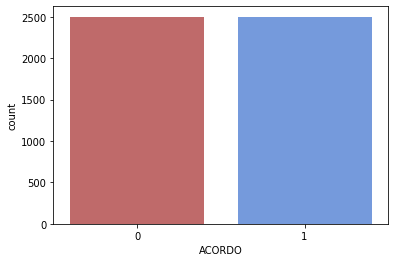

In [ ]:
sns.countplot(data=dados,x='ACORDO',palette=cols);

O gráfico de barras informa grande equilíbrio de "Acordo" e "Não acordo".

In [ ]:
dadosCopia = db_tratamento.copy

In [ ]:
dados_plot = db_tratamento.groupby('SEXO').ACORDO.mean().reset_index() 
dados_plot

,SEXO,ACORDO
0,0,0.508419
1,1,0.550000
2,2,0.490404


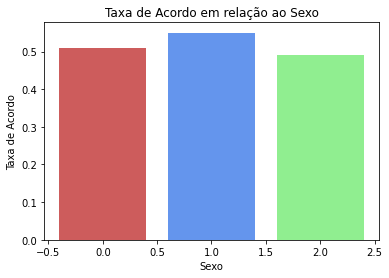

In [ ]:
#Sexo em relação a variável churn
x =dados_plot['SEXO']
y=dados_plot['ACORDO']
plt.bar(x,y,color=cols);
plt.title('Taxa de Acordo em relação ao Sexo');
plt.xlabel('Sexo');
plt.ylabel('Taxa de Acordo');

Sexo parece não influenciar muito no acordo.

In [ ]:
dado_plot = db_tratamento.groupby('GERAÇÃO').ACORDO.mean().reset_index()
dado_plot

,GERAÇÃO,ACORDO
0,0,0.555801
1,1,0.665405
2,2,0.431173
3,3,0.361972
4,4,0.276243


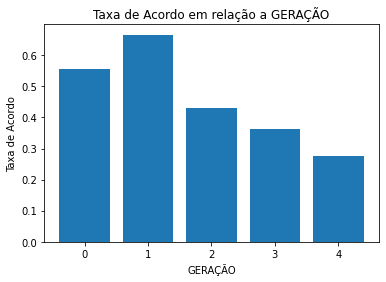

In [ ]:
x =dado_plot['GERAÇÃO']
y=dado_plot['ACORDO']
plt.bar(x,y);
plt.title('Taxa de Acordo em relação a GERAÇÃO');
plt.xlabel('GERAÇÃO');
plt.ylabel('Taxa de Acordo');

baby boomer e geração x parece ser mais propensos a fechar acordo

In [ ]:
dado_plot = db_tratamento.groupby('EMPREGO_FORMAL').ACORDO.mean().reset_index()
dado_plot

,EMPREGO_FORMAL,ACORDO
0,0.0,0.490886
1,1.0,0.509339


Ter emprego não infuencia muito no acordo.

In [ ]:
dado_plot = db_tratamento.groupby('SCORE_DIGITAL').ACORDO.mean().reset_index()
dado_plot

,SCORE_DIGITAL,ACORDO
0,0,0.463687
1,1,0.491803
2,2,0.455154
3,3,0.569113
4,4,0.501745
5,5,0.500000


score digital bem balanceado

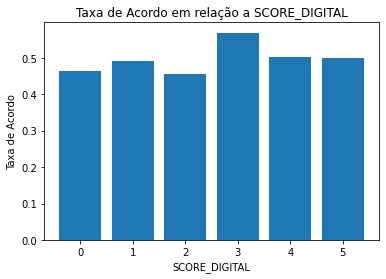

In [ ]:
x =dado_plot['SCORE_DIGITAL']
y=dado_plot['ACORDO']
plt.bar(x,y);
plt.title('Taxa de Acordo em relação a SCORE_DIGITAL');
plt.xlabel('SCORE_DIGITAL');
plt.ylabel('Taxa de Acordo');

In [ ]:
dado_plot = db_tratamento.groupby('RENDA').ACORDO.mean().reset_index()
dado_plot

,RENDA,ACORDO
0,0,0.472097
1,1,0.392857
2,2,0.500000
3,3,0.333333
4,4,0.666667
5,5,0.833333
6,6,0.750000
7,7,0.666667
8,8,0.500000
9,9,0.512418


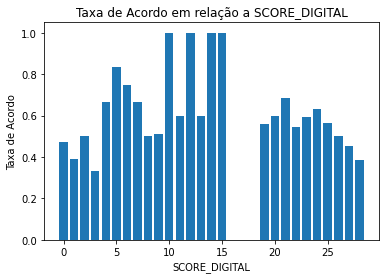

In [ ]:
x =dado_plot['RENDA']
y=dado_plot['ACORDO']
plt.bar(x,y);
plt.title('Taxa de Acordo em relação a SCORE_DIGITAL');
plt.xlabel('SCORE_DIGITAL');
plt.ylabel('Taxa de Acordo');

In [ ]:
dado_plot = db_tratamento.groupby('FLAG_DE_IMOVEL').ACORDO.mean().reset_index()
dado_plot

,FLAG_DE_IMOVEL,ACORDO
0,0.0,0.499795
1,1.0,0.526316


In [ ]:
dado_plot = db_tratamento.groupby('FLAG_DE_VEICULO').ACORDO.mean().reset_index()
dado_plot

,FLAG_DE_VEICULO,ACORDO
0,0.0,0.472346
1,1.0,0.662585


In [ ]:
db_tratamento[["FLAG_DE_VEICULO"]].value_counts(sort = False)

FLAG_DE_VEICULO
0.0                4249
1.0                 735
dtype: int64

In [ ]:
dado_plot = db_tratamento.groupby('PERSONADECREDITO').ACORDO.mean().reset_index()
dado_plot

,PERSONADECREDITO,ACORDO
0,0,0.327119
1,1,0.362319
2,2,0.533550
3,3,0.444231
4,4,0.562323
5,5,0.555321


Analisando o histórico de clientes, observamos algumas características entre os clientes que fecharam o acordo

Observa-se que clientes mais velhos, com maior score no serasa e que possuem veículo estão mais propensos a fechar o acordo

Uma atenção especial na renda. Renda altas acima de 30 mil estão com taxa de acordo menor do que rendas mais baixas. 

##**5. PRÉ PROCESSAMENTO**

Alguns algoritmos de machine learning não aceitam variáveis categóricas e por isso precisamos utilizar técnicas para converter as classes em números.

Ou seja, convertemos as colunas categóricas em numéricas simplesmente atribuindo números inteiros a classes distintas.

Para as variáveis categóricas com apenas duas classes utilizaremos a função Label Encoder para converte colunas categóricas em numéricas simplesmente atribuindo números inteiros a valores distintos.

Por exemplo, a coluna sexo tem dois valores: Feminino e Masculino . Após aplicar a função, os valores serão transformados em 1 e 0.

In [ ]:
df1 = db_tratamento.drop(columns = ['ACORDO_cat'])
df1


,SEXO,IDADE,GERAÇÃO,RENDA,CLASSEECONOMICA,UF,AREARISCO,FLAG_DE_SOCIO,FLAG_DE_VEICULO,FLAG_DE_BOLSAFAMILIA,FLAG_DE_APOSENTADOS,FLAG_DE_OBITO,FLAG_DE_IMOVEL,EMPREGO_FORMAL,SCORE,SCORE_FAIXA,PERSONADECREDITO,SCORE_DIGITAL,ACORDO
0,2,53.0,1,9,3,18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,2,0,0,0
1,1,40.0,2,9,3,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,257.0,0,3,2,0
2,2,48.0,1,21,1,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,852.0,3,2,2,1
3,0,48.0,1,27,4,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,810.0,3,2,4,1
4,2,45.0,1,19,2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,418.0,4,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,43.0,1,0,3,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420.0,4,4,4,1
4996,2,64.0,0,0,3,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,788.0,3,2,4,1
4997,2,40.0,2,9,3,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,407.0,4,4,1,1
4998,0,50.0,1,27,4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,4,4,4,1


In [ ]:
DF2 = df1[['IDADE', 'GERAÇÃO', 'RENDA', 'SCORE','PERSONADECREDITO','ACORDO']]

In [ ]:
df1 = df1.dropna()
DF2 = DF2.dropna()

## **6.MODELOS DE CLASSIFICAÇÃO**

In [ ]:
y = DF2['ACORDO']
X = df1.drop('ACORDO',axis = 1)
X

,SEXO,IDADE,GERAÇÃO,RENDA,CLASSEECONOMICA,UF,AREARISCO,FLAG_DE_SOCIO,FLAG_DE_VEICULO,FLAG_DE_BOLSAFAMILIA,FLAG_DE_APOSENTADOS,FLAG_DE_OBITO,FLAG_DE_IMOVEL,EMPREGO_FORMAL,SCORE,SCORE_FAIXA,PERSONADECREDITO,SCORE_DIGITAL
0,2,53.0,1,9,3,18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,2,0,0
1,1,40.0,2,9,3,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,257.0,0,3,2
2,2,48.0,1,21,1,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,852.0,3,2,2
3,0,48.0,1,27,4,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,810.0,3,2,4
4,2,45.0,1,19,2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,418.0,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,43.0,1,0,3,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420.0,4,4,4
4996,2,64.0,0,0,3,15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,788.0,3,2,4
4997,2,40.0,2,9,3,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,407.0,4,4,1
4998,0,50.0,1,27,4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,4,4,4


In [ ]:
features = ['SEXO',	'IDADE',	'GERAÇÃO','RENDA','CLASSEECONOMICA','UF',
            'AREARISCO',	'FLAG_DE_SOCIO',	'FLAG_DE_VEICULO',	'FLAG_DE_BOLSAFAMILIA',	'FLAG_DE_APOSENTADOS',
            'FLAG_DE_OBITO',	'FLAG_DE_IMOVEL',	'EMPREGO_FORMAL',	'SCORE',	'SCORE_FAIXA',	'PERSONADECREDITO','SCORE_DIGITAL']

In [ ]:
#Variáveis Continuas
x_cont=['IDADE','SCORE']
x_cont

['IDADE', 'SCORE']

As variáveis numéricas IDADE E Score estão em diferentes escalas e isso pode causar problemas no treinamento dos modelos de machine learning.

Para resolver esse problemas utilizaremos o método MiniMax para padronizar as variáveis contínuas, ou seja, vamos deixar todas as variáveis contínuas numa escala entre 0 e 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[x_cont] = scaler.fit_transform(X[x_cont])
X[x_cont]

,IDADE,SCORE
0,0.443038,0.119
1,0.278481,0.257
2,0.379747,0.852
3,0.379747,0.810
4,0.341772,0.418
...,...,...
4995,0.316456,0.420
4996,0.582278,0.788
4997,0.278481,0.407
4998,0.405063,0.334


In [ ]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x1_treino, x1_teste, y1_treino, y1_teste  = train_test_split(X, y, test_size = 0.3,random_state = 1)
x1_treino

,SEXO,IDADE,GERAÇÃO,RENDA,CLASSEECONOMICA,UF,AREARISCO,FLAG_DE_SOCIO,FLAG_DE_VEICULO,FLAG_DE_BOLSAFAMILIA,FLAG_DE_APOSENTADOS,FLAG_DE_OBITO,FLAG_DE_IMOVEL,EMPREGO_FORMAL,SCORE,SCORE_FAIXA,PERSONADECREDITO,SCORE_DIGITAL
1968,2,0.443038,1,0,3,25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.232,0,3,3
664,0,0.202532,2,27,4,16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.404,4,4,3
4228,0,0.088608,3,0,3,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.295,0,3,2
3798,0,0.544304,0,27,4,25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.062,2,0,4
2098,2,0.506329,0,22,1,25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.988,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,2,0.708861,0,19,2,22,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.383,4,4,4
2774,0,0.075949,3,27,4,17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494,4,4,0
905,2,0.468354,1,0,3,25,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.097,2,0,3
3991,0,0.240506,2,19,2,25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.129,2,0,2


## Aplicando o modelo de regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(x1_treino,y1_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#realizando classificação na amostra de teste
y1_previsto = modelo.predict(x1_teste)


In [ ]:
#criando a matriz de confusão
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y1_teste,y1_previsto)
cm


array([[438, 307],
       [247, 504]])

Text(33.0, 0.5, 'Real')

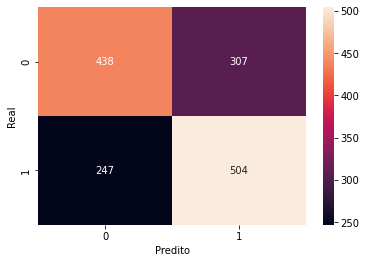

In [ ]:
sns.heatmap(cm,annot=True, fmt="d")
plt.xlabel('Predito')
plt.ylabel('Real')

In [ ]:
#calculando as metricas do modelo
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score,roc_auc_score

In [ ]:
#relatório de classificação
cr = classification_report(y1_teste,y1_previsto,labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.59      0.61       745
           1       0.62      0.67      0.65       751

    accuracy                           0.63      1496
   macro avg       0.63      0.63      0.63      1496
weighted avg       0.63      0.63      0.63      1496



In [ ]:
acc1 = accuracy_score(y1_previsto, y1_teste)
sen1 = recall_score(y1_previsto, y1_teste)
pre1 = precision_score(y1_previsto, y1_teste)
f1s1 = f1_score(y1_previsto, y1_teste)
auc1 = roc_auc_score(y1_previsto, y1_teste)
medidas = {'Acurácia': [acc1], 'Sensibilidade': [sen1], 'Precisão': [pre1], 'F1-Score': [f1s1], 'AUC': [auc1]}

In [ ]:
DF1 = pd.DataFrame(data = medidas, index = ['Regressão_Logistica1']).round(4)
DF1

,Acurácia,Sensibilidade,Precisão,F1-Score,AUC
Regressão_Logistica1,0.6297,0.6215,0.6711,0.6453,0.6304


In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.3 MB/s 
     |████████████████████████████████| 133 kB 27.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=313f804098efcaad832eeb670deb912da0cdc5482baabb846cdbe7d978edde86
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
# Identificando as melhores features
# Utilizamos a biblioteca Eli5 que calcula os pesos que cada feature teve no aprendizado do modelo.
perm = PermutationImportance(modelo, random_state=1).fit(x1_teste, y1_teste)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.0384 ± 0.0117,FLAG_DE_VEICULO
0.0354 ± 0.0083,GERAÇÃO
0.0130 ± 0.0101,IDADE
0.0080 ± 0.0067,FLAG_DE_OBITO
0.0066 ± 0.0154,PERSONADECREDITO
0.0059 ± 0.0131,RENDA
0.0048 ± 0.0078,FLAG_DE_SOCIO
0.0039 ± 0.0061,FLAG_DE_APOSENTADOS
0.0039 ± 0.0068,SCORE_FAIXA
0.0029 ± 0.0054,SCORE


##TREINAMENTO COM AS FEATURES MAIS IMPORTANTES

In [ ]:
top10_features = ['IDADE',	'GERAÇÃO','RENDA',
            	'FLAG_DE_SOCIO',	'FLAG_DE_VEICULO','FLAG_DE_APOSENTADOS',
            'FLAG_DE_OBITO','SCORE',	'SCORE_FAIXA',	'PERSONADECREDITO']
X2 = df1[top10_features]

In [ ]:
x2_treino, x2_teste, y2_treino, y2_teste  = train_test_split(X2, y, test_size = 0.3,random_state = 1)
x2_treino

,IDADE,GERAÇÃO,RENDA,FLAG_DE_SOCIO,FLAG_DE_VEICULO,FLAG_DE_APOSENTADOS,FLAG_DE_OBITO,SCORE,SCORE_FAIXA,PERSONADECREDITO
1968,53.0,1,0,0.0,1.0,0.0,0.0,232.0,0,3
664,34.0,2,27,0.0,0.0,0.0,0.0,404.0,4,4
4228,25.0,3,0,0.0,0.0,0.0,0.0,295.0,0,3
3798,61.0,0,27,0.0,0.0,1.0,0.0,62.0,2,0
2098,58.0,0,22,0.0,0.0,0.0,0.0,988.0,3,2
...,...,...,...,...,...,...,...,...,...,...
2906,74.0,0,19,1.0,0.0,1.0,0.0,383.0,4,4
2774,24.0,3,27,1.0,0.0,0.0,0.0,494.0,4,4
905,55.0,1,0,1.0,1.0,0.0,0.0,97.0,2,0
3991,37.0,2,19,0.0,1.0,0.0,0.0,129.0,2,0


In [ ]:
modelo2 = LogisticRegression()
modelo2.fit(x2_treino,y2_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#realizando classificação na amostra de teste 2
y_previsto2 = modelo2.predict(x2_teste)

In [ ]:
cm=confusion_matrix(y2_teste,y_previsto2)
cm

array([[459, 286],
       [262, 489]])

In [ ]:
cr = classification_report(y2_teste,y_previsto2,labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       745
           1       0.63      0.65      0.64       751

    accuracy                           0.63      1496
   macro avg       0.63      0.63      0.63      1496
weighted avg       0.63      0.63      0.63      1496



In [ ]:
acc2 = accuracy_score(y2_teste,y_previsto2)
sen2 = recall_score(y2_teste,y_previsto2)
pre2 = precision_score(y2_teste,y_previsto2)
f1s2 = f1_score(y2_teste,y_previsto2)
auc2 = roc_auc_score(y2_teste,y_previsto2)
medidas2 = {'Acurácia': [acc2], 'Sensibilidade': [sen2], 'Precisão': [pre2], 'F1-Score': [f1s2], 'AUC': [auc2]}

In [ ]:
Df2 = pd.DataFrame(data = medidas2, index = ['Regressão_Logistica2']).round(4)
Df2

,Acurácia,Sensibilidade,Precisão,F1-Score,AUC
Regressão_Logistica2,0.6337,0.6511,0.631,0.6409,0.6336


Com as variáveis mais importantes, conseguimos aumentar a sensibilidade, mas a precisão diminuiu.

## Aplicando o modelo de decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
x3_treino, x3_teste, y3_treino, y3_teste  = train_test_split(X, y, test_size = 0.3,random_state = 1)
x3_treino
modelotree = DecisionTreeClassifier() 
modelotree.fit(x3_treino,y3_treino)

DecisionTreeClassifier()

In [ ]:
y_pred_tree = modelotree.predict(x3_teste)

In [ ]:
y_pred_tree

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
y3_teste

2827    0
4201    1
1407    0
3902    1
372     0
       ..
1255    0
1681    0
1146    1
2023    0
321     0
Name: ACORDO, Length: 1496, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


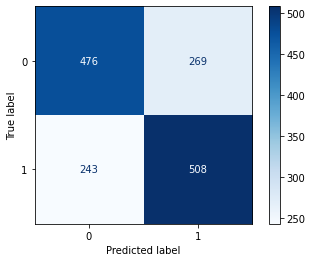

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelotree, x3_teste, y3_teste, cmap='Blues')

In [ ]:
cr = classification_report(y3_teste,y_pred_tree,labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       745
           1       0.65      0.68      0.66       751

    accuracy                           0.66      1496
   macro avg       0.66      0.66      0.66      1496
weighted avg       0.66      0.66      0.66      1496



In [ ]:
acc3 = accuracy_score(y_pred_tree, y3_teste)
sen3 = recall_score(y_pred_tree, y3_teste)
pre3 = precision_score(y_pred_tree, y3_teste)
f1s3 = f1_score(y_pred_tree, y3_teste)
auc3 = roc_auc_score(y_pred_tree, y3_teste)
medidas3 = {'Acurácia': [acc3], 'Sensibilidade': [sen3], 'Precisão': [pre3], 'F1-Score': [f1s3], 'AUC': [auc3]}
Df3 = pd.DataFrame(data = medidas3, index = ['Árvore de Decisão']).round(4)
Df3

,Acurácia,Sensibilidade,Precisão,F1-Score,AUC
Árvore de Decisão,0.6578,0.6538,0.6764,0.6649,0.6579


In [ ]:
perm = PermutationImportance(modelotree, random_state=1).fit(x3_teste, y3_teste)
eli5.show_weights(perm, feature_names = features)

Weight,Feature
0.0841 ± 0.0238,UF
0.0775 ± 0.0072,GERAÇÃO
0.0707 ± 0.0301,IDADE
0.0190 ± 0.0079,SCORE
0.0171 ± 0.0095,FLAG_DE_VEICULO
0.0120 ± 0.0063,SCORE_DIGITAL
0.0103 ± 0.0082,RENDA
0.0064 ± 0.0093,CLASSEECONOMICA
0.0063 ± 0.0086,SEXO
0.0059 ± 0.0053,FLAG_DE_OBITO


Idade e Geração são correlacionadas e por isso estão próximas. 
- Hipóteses do porquê a idade ser uma variável imortante:
- Jovens até 26 anos ainda estão no início da carreira ou desempregados.
- Idosos possuem compromissos mais importantes pra lidar como a saúde e compras de medicamentos.

## TREINAMENTO COM AS FEATURES MAIS IMPORTANTES

In [ ]:
top12_features = ['UF', 'IDADE', 'GERAÇÃO', 'SCORE', 'SCORE_DIGITAL', 'FLAG_DE_VEICULO', 'RENDA', 
                  'FLAG_DE_OBITO', 'CLASSEECONOMICA', 'PERSONADECREDITO', 'FLAG_DE_BOLSAFAMILIA', 'SCORE_FAIXA']
X3 = df1[top12_features]

In [ ]:
x4_treino, x4_teste, y4_treino, y4_teste  = train_test_split(X3, y, test_size = 0.3,random_state = 1)
x4_treino
modelotree2 = DecisionTreeClassifier() 
modelotree2.fit(x4_treino,y4_treino)

DecisionTreeClassifier()

In [ ]:
y_pred_tree2 = modelotree2.predict(x4_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


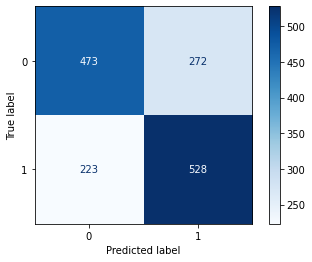

In [ ]:
plot_confusion_matrix(modelotree2, x4_teste, y4_teste, cmap='Blues')

In [ ]:
cr = classification_report(y4_teste, y_pred_tree2, labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.63      0.66       745
           1       0.66      0.70      0.68       751

    accuracy                           0.67      1496
   macro avg       0.67      0.67      0.67      1496
weighted avg       0.67      0.67      0.67      1496



In [ ]:
acc4 = accuracy_score(y_pred_tree2, y4_teste)
sen4 = recall_score(y_pred_tree2, y4_teste)
pre4 = precision_score(y_pred_tree2, y4_teste)
f1s4 = f1_score(y_pred_tree2, y4_teste)
auc4 = roc_auc_score(y_pred_tree2, y4_teste)
medidas4 = {'Acurácia': [acc4], 'Sensibilidade': [sen4], 'Precisão': [pre4], 'F1-Score': [f1s4], 'AUC': [auc4]}
Df4 = pd.DataFrame(data = medidas4, index = ['Árvore de Decisão Top 12']).round(4)
Df4

,Acurácia,Sensibilidade,Precisão,F1-Score,AUC
Árvore de Decisão Top 12,0.6691,0.66,0.7031,0.6809,0.6698


Considerando as features mais importantes, o modelo chega a 67% de acurácia. Com uma bom equilibrio de especificidade e sensibilidade.

## **6. AJUSTE**

O ajuste será realizado com o GridSearch considerando o melhor modelo até agora( DecisionTree) e as melhores 12 features.

In [ ]:
from sklearn.model_selection import GridSearchCV


dt = DecisionTreeClassifier(random_state=61658)

# dicionário de hiperparâmetros a serem testados
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,3,4,5,6,7,8,9],
}

grid = GridSearchCV(
    dt,
    params,
    cv=10,
    scoring='roc_auc',
    verbose=10,
    n_jobs=1,
)

grid.fit(x4_treino,y4_treino)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 1/10; 1/16] END criterion=gini, max_depth=2;, score=0.674 total time=   0.0s
[CV 2/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 2/10; 1/16] END criterion=gini, max_depth=2;, score=0.657 total time=   0.0s
[CV 3/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 3/10; 1/16] END criterion=gini, max_depth=2;, score=0.652 total time=   0.0s
[CV 4/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 4/10; 1/16] END criterion=gini, max_depth=2;, score=0.623 total time=   0.0s
[CV 5/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 5/10; 1/16] END criterion=gini, max_depth=2;, score=0.686 total time=   0.0s
[CV 6/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 6/10; 1/16] END criterion=gini, max_depth=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='roc_auc', verbose=10)

In [ ]:
grid.best_params_  # Melhores parâmetros encontrados

{'criterion': 'gini', 'max_depth': 7}

In [ ]:
grid.best_score_ # Melhor pontuação de ajuste

0.7564191155653701

In [ ]:
grid.best_estimator_ # melhores estimadores

DecisionTreeClassifier(max_depth=7, random_state=61658)

In [ ]:
modelo_ajustado = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=61658) 
modelo_ajustado.fit(x4_treino,y4_treino)

DecisionTreeClassifier(max_depth=7, random_state=61658)

In [ ]:
y_pred_treeAjustado = modelo_ajustado.predict(x4_teste)

In [ ]:
print (pd.crosstab(y4_teste, y_pred_treeAjustado, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito    0    1   All
Real                   
0        512  233   745
1        227  524   751
All      739  757  1496


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


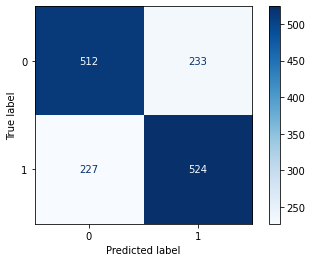

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelo_ajustado, x4_teste, y4_teste, cmap='Blues')

In [ ]:
print(classification_report(y4_teste, y_pred_treeAjustado))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       745
           1       0.69      0.70      0.69       751

    accuracy                           0.69      1496
   macro avg       0.69      0.69      0.69      1496
weighted avg       0.69      0.69      0.69      1496



In [ ]:
acc5 = accuracy_score(y_pred_treeAjustado, y4_teste)
sen5 = recall_score(y_pred_treeAjustado, y4_teste)
pre5 = precision_score(y_pred_treeAjustado, y4_teste)
f1s5 = f1_score(y_pred_treeAjustado, y4_teste)
auc5 = roc_auc_score(y_pred_treeAjustado, y4_teste)
medidas5 = {'Acurácia': [acc5], 'Sensibilidade': [sen5], 'Precisão': [pre5], 'F1-Score': [f1s5], 'AUC': [auc5]}
Df5 = pd.DataFrame(data = medidas5, index = ['Árvore de Decisão top 12 Ajustada']).round(4)
Df5

,Acurácia,Sensibilidade,Precisão,F1-Score,AUC
Árvore de Decisão top 12 Ajustada,0.6925,0.6922,0.6977,0.695,0.6925


Após o ajuste do modelo, todas as métricas melhoraram. Chegando a quase 70% de acurácia

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y4_teste, grid.predict_proba(x4_teste)[:,1])

0.758379431451577

## **Aplicando o modelo de XGBoost**

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# ajuste do modelo nos dados de treino
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1.0,
 seed=27)
xgb.fit(x4_treino, y4_treino)

XGBClassifier(colsample_bytree=0.8, max_depth=6, n_estimators=1000, nthread=4,
              scale_pos_weight=1.0, seed=27, subsample=0.8)

In [ ]:
preditos_xgb = xgb.predict(x4_teste)
print (pd.crosstab(y4_teste,preditos_xgb, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1   All
Real                   
0        515  230   745
1        208  543   751
All      723  773  1496


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y4_teste, preditos_xgb))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       745
           1       0.70      0.72      0.71       751

    accuracy                           0.71      1496
   macro avg       0.71      0.71      0.71      1496
weighted avg       0.71      0.71      0.71      1496



In [ ]:
acc6 = accuracy_score(preditos_xgb, y4_teste)
sen6 = recall_score(preditos_xgb, y4_teste)
pre6 = precision_score(preditos_xgb, y4_teste)
f1s6 = f1_score(preditos_xgb, y4_teste)
auc6 = roc_auc_score(preditos_xgb, y4_teste)
medidas6 = {'Acurácia': [acc6], 'Sensibilidade': [sen6], 'Precisão': [pre6], 'F1-Score': [f1s6], 'AUC': [auc6]}
Df6 = pd.DataFrame(data = medidas6, index = ['XGBClassifier']).round(4)
Df6

,Acurácia,Sensibilidade,Precisão,F1-Score,AUC
XGBClassifier,0.7072,0.7025,0.723,0.7126,0.7074


In [ ]:
from sklearn.ensemble import VotingClassifier # União dos melhores modelos
# Voting Classifier com soft voting 
voto = VotingClassifier(estimators=[('modelo_ajustado', modelo_ajustado),('xgb',xgb)], voting='soft')
voto = voto.fit(x4_treino,y4_treino)
y_predito = voto.predict(x4_teste)
print(classification_report(y4_teste, y_predito))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       745
           1       0.71      0.72      0.72       751

    accuracy                           0.72      1496
   macro avg       0.72      0.72      0.72      1496
weighted avg       0.72      0.72      0.72      1496



In [ ]:
acc7 = accuracy_score(y_predito, y4_teste)
sen7 = recall_score(y_predito, y4_teste)
pre7 = precision_score(y_predito, y4_teste)
f1s7 = f1_score(y_predito, y4_teste)
auc7 = roc_auc_score(y_predito, y4_teste)
medidas7 = {'Acurácia': [acc7], 'Sensibilidade': [sen7], 'Precisão': [pre7], 'F1-Score': [f1s7], 'AUC': [auc7]}
Df7 = pd.DataFrame(data = medidas7, index = ['VotingClassifier']).round(4)
Df7

,Acurácia,Sensibilidade,Precisão,F1-Score,AUC
VotingClassifier,0.7152,0.7141,0.7217,0.7179,0.7153


In [ ]:
pd.concat([DF1, Df2, Df3, Df4, Df5, Df6, Df7])

,Acurácia,Sensibilidade,Precisão,F1-Score,AUC
Regressão_Logistica1,0.6297,0.6215,0.6711,0.6453,0.6304
Regressão_Logistica2,0.6337,0.6511,0.6310,0.6409,0.6336
Árvore de Decisão,0.6578,0.6538,0.6764,0.6649,0.6579
Árvore de Decisão Top 12,0.6691,0.6600,0.7031,0.6809,0.6698
Árvore de Decisão top 12 Ajustada,0.6925,0.6922,0.6977,0.6950,0.6925
XGBClassifier,0.7072,0.7025,0.7230,0.7126,0.7074
VotingClassifier,0.7152,0.7141,0.7217,0.7179,0.7153


#CONCLUSÃO

  Os modelos de ensemble como o voting e o XGB, por serem mais robustos, tiveram um melhor resultado e passaram dos 70% nas principais métricas de avaliação. A desvantagem é que eles são muitos custosos e dificilmente vão para a produção. Por outro lado, modelos mais simples como a árvore de decisão também teve um bom desempenho. Apenas realizando uma seleção das melhores variáveis. 
